In [22]:
import numpy as np
import pandas as pd
import re

In [28]:
df = pd.read_csv('/home/mr1142/Documents/Data/segmentation/splited/validation/validation_data.csv')
labels = [re.split('[|]', df['Finding Labels'][i]) for i in df.index]
labels = [x for xs in labels for x in xs]
labels = list(np.unique(labels))
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [226]:
path = '/home/mr1142/Documents/Data/models/validation_results/validation_results' + '' + '.csv'
df = pd.read_csv(path)

In [227]:
df.sort_values('dice_coef_loss')

,type,name,loss,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
28,unet,renacimiento_validation_1,0.032621,0.032179,0.092485,0.973949,0.974434,88665.0,80353.0
2,unet,_albumentation_validation_2.h5,0.034487,0.034487,0.095812,0.973940,0.974166,7962.0,5701.0
21,uloss,albumentation_rotate_3_validation_2,0.129951,0.034909,0.094568,0.971946,0.973499,87304.0,94711.0
20,uloss,albumentation_rotate_3_validation_1,0.128454,0.035279,0.092766,0.971818,0.972174,78499.0,104346.0
19,unet,albumentation_rotate_3_validation_2,0.035893,0.035434,0.097252,0.971598,0.971085,81626.0,102645.0
4,uloss,_albumentation_validation_2.h5,0.149065,0.036346,0.112719,0.972670,0.973263,6937.0,7392.0
3,unet,_albumentation_validation_3.h5,0.036912,0.036912,0.118864,0.972273,0.971054,7108.0,7429.0
17,unet,albumentation_rotate_3_validation_1,0.037508,0.036994,0.104480,0.970098,0.969842,87088.0,106918.0
0,unet,_albumentation_validation_1.h5,0.037296,0.037296,0.117240,0.971939,0.970628,7386.0,7326.0
23,uloss,validation_rotate_normalization_1,0.134512,0.037305,0.097394,0.970390,0.971013,91815.0,100297.0


In [228]:
len(df[df.type == 'uloss'])

14

In [229]:
len(df[df.type == 'uloss']) == len(df[df.type == 'unet'])

False

In [230]:
evaluations = list(df.columns[3:9])

for ev in evaluations:
    print(ev)
    print('unet: {}'.format(np.mean(df[ev][df.type == 'unet'])))
    print('uloss: {}'.format(np.mean(df[ev][df.type == 'uloss'])))
    print('-----')

dice_coef_loss
unet: 0.03891638806089759
uloss: 0.039884169452956746
-----
loss_mask
unet: 0.10863791033625603
uloss: 0.10507512890866824
-----
accuracy
unet: 0.9689139984548092
uloss: 0.9682681219918388
-----
AUC
unet: 0.969100259244442
uloss: 0.9699227554457528
-----
false_positives
unet: 92129.375
uloss: 91397.21428571429
-----
false_negatives
unet: 88568.5
uloss: 100113.78571428571
-----


In [236]:
names = ['_albumentation', 'albumentation_2', 'gamma', 'rotate', 'old', 'clahe', 'renacimiento', 'pre']

In [237]:
tipos = {}
tipos['unet'] = {}
tipos['uloss'] = {}
for ev in evaluations:
    tipos['unet'][ev] = np.mean(df[ev][df.type == 'unet'])
    tipos['uloss'][ev] = np.mean(df[ev][df.type == 'uloss'])
    for name in names:
        index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
        try:
            tipos[name][ev] = np.mean(df[ev].iloc[index])
        except:
            tipos[name] = {}
            tipos[name][ev] = np.mean(df[ev].iloc[index])

In [238]:
tipos

{'unet': {'dice_coef_loss': 0.03891638806089759,
  'loss_mask': 0.10863791033625603,
  'accuracy': 0.9689139984548092,
  'AUC': 0.969100259244442,
  'false_positives': 92129.375,
  'false_negatives': 88568.5},
 'uloss': {'dice_coef_loss': 0.039884169452956746,
  'loss_mask': 0.10507512890866824,
  'accuracy': 0.9682681219918388,
  'AUC': 0.9699227554457528,
  'false_positives': 91397.21428571429,
  'false_negatives': 100113.78571428571},
 '_albumentation': {'dice_coef_loss': 0.038095573584238686,
  'loss_mask': 0.1118261528511842,
  'accuracy': 0.9712880452473959,
  'AUC': 0.9713239371776581,
  'false_positives': 7940.333333333333,
  'false_negatives': 7113.0},
 'albumentation_2': {'dice_coef_loss': 0.041732468331853546,
  'loss_mask': 0.10947780559460323,
  'accuracy': 0.9661622444788615,
  'AUC': 0.9682995776335398,
  'false_positives': 116122.5,
  'false_negatives': 103419.0},
 'gamma': {'dice_coef_loss': 0.043595874682068825,
  'loss_mask': 0.11524219810962677,
  'accuracy': 0.9649

In [239]:
comparation = {}
for k in tipos['unet'].keys():
    comparation[k] = []
    for j in tipos.keys():
        comparation[k].append(tipos[j][k])
comparation = pd.DataFrame(comparation)
comparation.index = tipos.keys()

In [240]:
comparation.sort_values('dice_coef_loss')

,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
renacimiento,0.032179,0.092485,0.973949,0.974434,88665.000000,80353.000000
rotate,0.037674,0.100062,0.969520,0.969773,124256.200000,141691.700000
_albumentation,0.038096,0.111826,0.971288,0.971324,7940.333333,7113.000000
unet,0.038916,0.108638,0.968914,0.969100,92129.375000,88568.500000
uloss,0.039884,0.105075,0.968268,0.969923,91397.214286,100113.785714
clahe,0.041605,0.112802,0.966717,0.968160,85106.000000,82963.500000
albumentation_2,0.041732,0.109478,0.966162,0.968300,116122.500000,103419.000000
gamma,0.043596,0.115242,0.964955,0.966884,113255.500000,114120.000000
old,NaN,NaN,NaN,NaN,NaN,NaN
pre,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
index = [i for i in df.index if any([bool(re.search(name, df['name'][i])) for name in ['old', 'clahe', 'gamma']])]

In [242]:
df = df.drop(index).reset_index()

In [243]:
tipos = {}
for tipo in ['unet', 'uloss']:
    for ev in evaluations:
        for name in names:
            index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
            try:
                tipos[tipo + '_' + name][ev] = np.mean(df[ev].iloc[index][df['type']==tipo])
            except:
                tipos[tipo + '_' + name] = {}
                tipos[tipo + '_' + name][ev] = np.mean(df[ev].iloc[index][df['type']==tipo])

In [244]:
tipos

{'unet__albumentation': {'dice_coef_loss': 0.0362317164738973,
  'loss_mask': 0.11063904066880544,
  'accuracy': 0.97271728515625,
  'AUC': 0.9719493389129639,
  'false_positives': 7485.333333333333,
  'false_negatives': 6818.666666666667},
 'unet_albumentation_2': {'dice_coef_loss': 0.040284754087527595,
  'loss_mask': 0.10960243890682857,
  'accuracy': 0.9670277635256449,
  'AUC': 0.967993974685669,
  'false_positives': 122591.33333333333,
  'false_negatives': 91334.66666666667},
 'unet_gamma': {'dice_coef_loss': nan,
  'loss_mask': nan,
  'accuracy': nan,
  'AUC': nan,
  'false_positives': nan,
  'false_negatives': nan},
 'unet_rotate': {'dice_coef_loss': 0.0380487747490406,
  'loss_mask': 0.10248342454433441,
  'accuracy': 0.9691070199012757,
  'AUC': 0.9687735438346863,
  'false_positives': 123434.2,
  'false_negatives': 145757.6},
 'unet_old': {'dice_coef_loss': nan,
  'loss_mask': nan,
  'accuracy': nan,
  'AUC': nan,
  'false_positives': nan,
  'false_negatives': nan},
 'unet_c

In [245]:
comparation = {}
for k in tipos['uloss_clahe'].keys():
    comparation[k] = []
    for j in tipos.keys():
        comparation[k].append(tipos[j][k])
comparation = pd.DataFrame(comparation)
comparation.index = tipos.keys()

In [246]:
comparation.sort_values('dice_coef_loss')

,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
unet_renacimiento,0.032179,0.092485,0.973949,0.974434,88665.000000,80353.000000
unet__albumentation,0.036232,0.110639,0.972717,0.971949,7485.333333,6818.666667
uloss_rotate,0.037299,0.097640,0.969933,0.970772,125078.200000,137625.800000
unet_rotate,0.038049,0.102483,0.969107,0.968774,123434.200000,145757.600000
uloss__albumentation,0.039959,0.113013,0.969859,0.970699,8395.333333,7407.333333
unet_albumentation_2,0.040285,0.109602,0.967028,0.967994,122591.333333,91334.666667
uloss_albumentation_2,0.043180,0.109353,0.965297,0.968605,109653.666667,115503.333333
unet_gamma,NaN,NaN,NaN,NaN,NaN,NaN
unet_old,NaN,NaN,NaN,NaN,NaN,NaN
unet_clahe,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

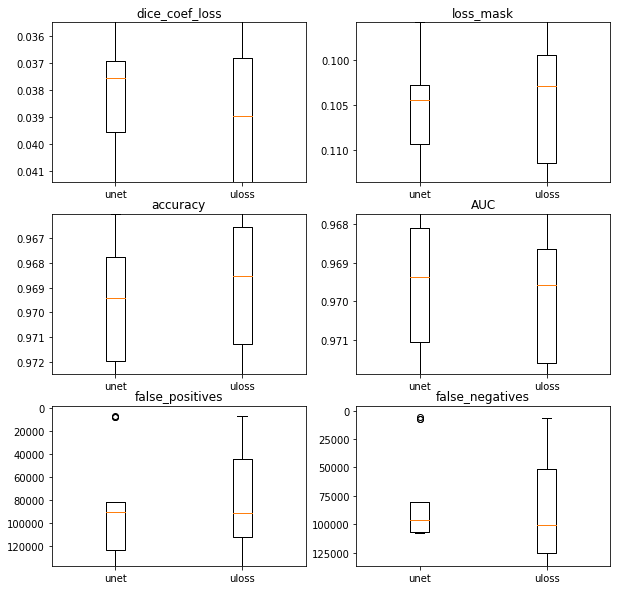

In [248]:
unet = df[['name'] + evaluations][df.type == 'unet'].reset_index()
uloss = df[['name'] + evaluations][df.type == 'uloss'].reset_index()

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(10,10)

for i, ev in enumerate(evaluations):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    ax[x,y].boxplot([unet[ev], uloss[ev]], labels = ['unet', 'uloss'])
    q1, q3 = np.percentile(df[ev], [20, 80])
    r = q1-q3
    ax[x,y].set_ylim(q1-1.1*r, q3+1.1*r)
    ax[x,y].set_title(ev)

In [249]:
# data = {}
# for tipo in ['unet', 'uloss']:
#     data[tipo] = {}
#     for name in names:
#         d = df[df.type == 'unet'].reset_index()
#         index = [i for i in d.index if bool(re.search(name, d['name'][i]))]
#         data[tipo][name] = d.iloc[index]

In [250]:
data = {}
for name in names:
    index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
    data[name] = df.iloc[index]

In [251]:
data

{'_albumentation':    index   type                            name      loss  dice_coef_loss  \
 0      0   unet  _albumentation_validation_1.h5  0.037296        0.037296   
 1      1  uloss  _albumentation_validation_1.h5  0.141863        0.038948   
 2      2   unet  _albumentation_validation_2.h5  0.034487        0.034487   
 3      3   unet  _albumentation_validation_3.h5  0.036912        0.036912   
 4      4  uloss  _albumentation_validation_2.h5  0.149065        0.036346   
 5      5  uloss  _albumentation_validation_3.h5  0.167991        0.044584   
 
    loss_mask  accuracy       AUC  false_positives  false_negatives  
 0   0.117240  0.971939  0.970628           7386.0           7326.0  
 1   0.102915  0.970747  0.970617           7504.0           7833.0  
 2   0.095812  0.973940  0.974166           7962.0           5701.0  
 3   0.118864  0.972273  0.971054           7108.0           7429.0  
 4   0.112719  0.972670  0.973263           6937.0           7392.0  
 5   0.123406 

In [252]:
len(datos_unet)

6

ValueError: List of boxplot statistics and `positions` values must have same the length

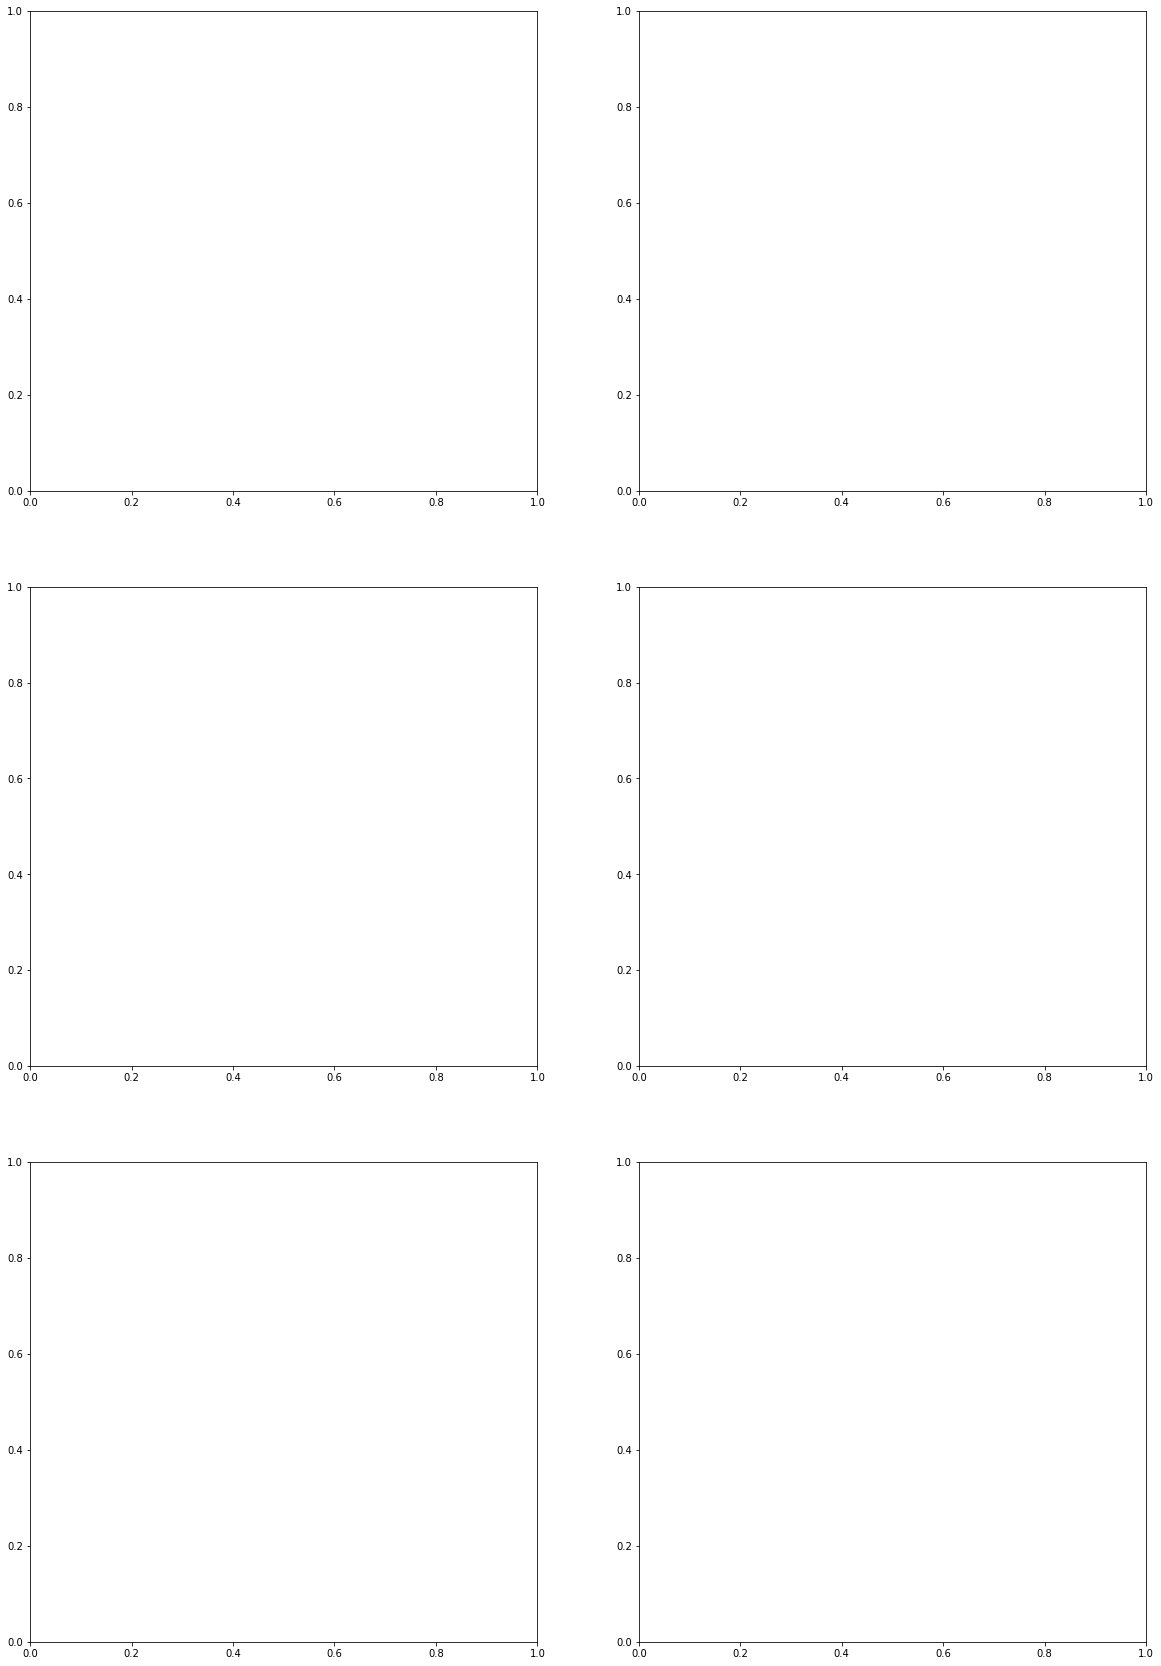

In [253]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20,30)

for i, ev in enumerate(evaluations):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    datos_unet = [data[name][ev][data[name].type == 'unet'] for name in names]
    datos_uloss = [data[name][ev][data[name].type == 'uloss'] for name in names]
    labels = [name + '_unet' for name in names]
    ax[x,y].boxplot(datos_unet, positions = [1,3,5,7,9,11,13,15,17], patch_artist=True)
    labels = [name + '_uloss' for name in names]
    ax[x,y].boxplot(datos_uloss, positions = [2,4,6,8,10,12,14,16,18])
    q1, q3 = np.percentile(df[ev], [25, 75])
    r = q1-q3
    ax[x,y].set_xticklabels(names*2, rotation=90)
    ax[x,y].set_ylim(q1-3*r, q3+3*r)
    ax[x,y].set_title(ev)